In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error


from prophet import Prophet
from xgboost import XGBRegressor

In [1]:
pip install darts

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error


from prophet import Prophet
from xgboost import XGBRegressor

In [3]:
df1=pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2014.csv')

In [4]:
df2 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2015.csv')

In [5]:
df3 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2016.csv')

In [6]:
df4 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2017.csv')

In [7]:
df5 =  pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2018.csv')

In [8]:
df6 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2019.csv')

In [9]:
df7 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2020.csv')

In [10]:
df8 =pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2021.csv')

In [11]:
df9 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2022.csv')

In [12]:
sandiego_df1 = df1[(df1['fips_code'] == 6073) & (df1['county'] == 'San Diego')]

In [13]:
sandiego_df1['run_start_time'] = pd.to_datetime(sandiego_df1['run_start_time'])

C:\Users\halee\AppData\Local\Temp\ipykernel_5128\2952790455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df1['run_start_time'] = pd.to_datetime(sandiego_df1['run_start_time'])


In [14]:
# Convert run_start_time to datetime format
sandiego_df1['run_start_time'] = pd.to_datetime(sandiego_df1['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df1.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_5128\1902342349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df1['run_start_time'] = pd.to_datetime(sandiego_df1['run_start_time'])


In [15]:
# Resample the data to daily frequency and take the highest outage number for each day
daily_max_outages_san_diego1 = sandiego_df1.resample('D')['sum'].max()

In [16]:
# Create a new DataFrame from the resampled data
daily_max_outages_san_diego_df1 = daily_max_outages_san_diego1.to_frame().reset_index()

In [17]:
# Rename the columns for clarity
daily_max_outages_san_diego_df1.columns = ['Date', 'Highest_Outage']

In [18]:

print(daily_max_outages_san_diego_df1)

         Date  Highest_Outage
0  2014-11-01            3191
1  2014-11-02             251
2  2014-11-03             205
3  2014-11-04             659
4  2014-11-05            1769
..        ...             ...
56 2014-12-27            4212
57 2014-12-28             226
58 2014-12-29            1699
59 2014-12-30            1593
60 2014-12-31            1593

[61 rows x 2 columns]


In [19]:
# Resample the data to hourly frequency and take the highest outage number for each hour
hourly_max_outages_san_diego1 = sandiego_df1.resample('H')['sum'].max()

In [20]:
# Create a new DataFrame from the resampled data
hourly_max_outages_san_diego_df1 = hourly_max_outages_san_diego1.to_frame().reset_index()

In [21]:
# Rename the columns for clarity
hourly_max_outages_san_diego_df1.columns = ['Date', 'Highest_Outage']

print(hourly_max_outages_san_diego_df1)

                    Date  Highest_Outage
0    2014-11-01 06:00:00           377.0
1    2014-11-01 07:00:00             NaN
2    2014-11-01 08:00:00             NaN
3    2014-11-01 09:00:00             NaN
4    2014-11-01 10:00:00             NaN
...                  ...             ...
1430 2014-12-30 20:00:00           185.0
1431 2014-12-30 21:00:00           177.0
1432 2014-12-30 22:00:00           134.0
1433 2014-12-30 23:00:00          1593.0
1434 2014-12-31 00:00:00          1593.0

[1435 rows x 2 columns]


In [22]:
hourly_max_outages_san_diego1 = hourly_max_outages_san_diego_df1.fillna(0)

In [23]:
hourly_max_outages_san_diego1

,Date,Highest_Outage
0,2014-11-01 06:00:00,377.0
1,2014-11-01 07:00:00,0.0
2,2014-11-01 08:00:00,0.0
3,2014-11-01 09:00:00,0.0
4,2014-11-01 10:00:00,0.0
...,...,...
1430,2014-12-30 20:00:00,185.0
1431,2014-12-30 21:00:00,177.0
1432,2014-12-30 22:00:00,134.0
1433,2014-12-30 23:00:00,1593.0


In [24]:
sandiego_df2 = df2[(df2['fips_code'] == 6073) & (df2['county'] == 'San Diego')]

In [25]:
# Convert run_start_time to datetime format
sandiego_df2['run_start_time'] = pd.to_datetime(sandiego_df2['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df2.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_5128\4224898449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df2['run_start_time'] = pd.to_datetime(sandiego_df2['run_start_time'])


In [26]:
# Resample the data to daily frequency and take the highest outage number for each day
daily_max_outages_san_diego2 = sandiego_df2.resample('D')['sum'].max()

In [27]:
# Create a new DataFrame from the resampled data
daily_max_outages_san_diego_df2 = daily_max_outages_san_diego2.to_frame().reset_index()

In [28]:
# Rename the columns for clarity
daily_max_outages_san_diego_df2.columns = ['Date', 'Highest_Outage']

In [29]:

print(daily_max_outages_san_diego_df2)

          Date  Highest_Outage
0   2015-01-01          4432.0
1   2015-01-02          1718.0
2   2015-01-03           385.0
3   2015-01-04          1091.0
4   2015-01-05          1258.0
..         ...             ...
360 2015-12-27           975.0
361 2015-12-28          1066.0
362 2015-12-29           292.0
363 2015-12-30          4989.0
364 2015-12-31           112.0

[365 rows x 2 columns]


In [30]:
# Resample the data to hourly frequency and take the highest outage number for each hour
hourly_max_outages_san_diego2= sandiego_df2.resample('H')['sum'].max()

In [31]:
# Create a new DataFrame from the resampled data
hourly_max_outages_san_diego_df2 = hourly_max_outages_san_diego2.to_frame().reset_index()

In [32]:
# Rename the columns for clarity
hourly_max_outages_san_diego_df2.columns = ['Date', 'Highest_Outage']

print(hourly_max_outages_san_diego_df2)

                    Date  Highest_Outage
0    2015-01-01 05:00:00           126.0
1    2015-01-01 06:00:00           126.0
2    2015-01-01 07:00:00             2.0
3    2015-01-01 08:00:00             NaN
4    2015-01-01 09:00:00             NaN
...                  ...             ...
8727 2015-12-30 20:00:00           178.0
8728 2015-12-30 21:00:00           195.0
8729 2015-12-30 22:00:00           178.0
8730 2015-12-30 23:00:00           112.0
8731 2015-12-31 00:00:00           112.0

[8732 rows x 2 columns]


In [33]:
hourly_max_outages_san_diego2 = hourly_max_outages_san_diego_df2.fillna(0)

In [34]:
hourly_max_outages_san_diego2

,Date,Highest_Outage
0,2015-01-01 05:00:00,126.0
1,2015-01-01 06:00:00,126.0
2,2015-01-01 07:00:00,2.0
3,2015-01-01 08:00:00,0.0
4,2015-01-01 09:00:00,0.0
...,...,...
8727,2015-12-30 20:00:00,178.0
8728,2015-12-30 21:00:00,195.0
8729,2015-12-30 22:00:00,178.0
8730,2015-12-30 23:00:00,112.0


In [35]:
sandiego_df3 = df3[(df3['fips_code'] == 6073) & (df3['county'] == 'San Diego')]

In [36]:
# Convert run_start_time to datetime format
sandiego_df3['run_start_time'] = pd.to_datetime(sandiego_df3['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df3.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_5128\3611938441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df3['run_start_time'] = pd.to_datetime(sandiego_df3['run_start_time'])


In [37]:
# Resample the data to daily frequency and take the highest outage number for each day
daily_max_outages_san_diego3 = sandiego_df3.resample('D')['sum'].max()

In [38]:
# Create a new DataFrame from the resampled data
daily_max_outages_san_diego_df3 = daily_max_outages_san_diego3.to_frame().reset_index()

In [39]:
# Rename the columns for clarity
daily_max_outages_san_diego_df3.columns = ['Date', 'Highest_Outage']

In [40]:

print(daily_max_outages_san_diego_df3)

          Date  Highest_Outage
0   2016-01-01            4176
1   2016-01-02            1922
2   2016-01-03             618
3   2016-01-04             316
4   2016-01-05            6054
..         ...             ...
360 2016-12-26           10763
361 2016-12-27             899
362 2016-12-28            3420
363 2016-12-29             434
364 2016-12-30            2713

[365 rows x 2 columns]


In [41]:
# Resample the data to hourly frequency and take the highest outage number for each hour
hourly_max_outages_san_diego3= sandiego_df3.resample('H')['sum'].max()

In [42]:
# Create a new DataFrame from the resampled data
hourly_max_outages_san_diego_df3 = hourly_max_outages_san_diego3.to_frame().reset_index()

In [43]:
# Rename the columns for clarity
hourly_max_outages_san_diego_df3.columns = ['Date', 'Highest_Outage']

print(hourly_max_outages_san_diego_df3)

                    Date  Highest_Outage
0    2016-01-01 18:00:00             1.0
1    2016-01-01 19:00:00             1.0
2    2016-01-01 20:00:00             1.0
3    2016-01-01 21:00:00             1.0
4    2016-01-01 22:00:00          1422.0
...                  ...             ...
8735 2016-12-30 17:00:00           539.0
8736 2016-12-30 18:00:00          2493.0
8737 2016-12-30 19:00:00            43.0
8738 2016-12-30 20:00:00            20.0
8739 2016-12-30 21:00:00            20.0

[8740 rows x 2 columns]


In [44]:
hourly_max_outages_san_diego3 = hourly_max_outages_san_diego_df3.fillna(0)

In [45]:
hourly_max_outages_san_diego3

,Date,Highest_Outage
0,2016-01-01 18:00:00,1.0
1,2016-01-01 19:00:00,1.0
2,2016-01-01 20:00:00,1.0
3,2016-01-01 21:00:00,1.0
4,2016-01-01 22:00:00,1422.0
...,...,...
8735,2016-12-30 17:00:00,539.0
8736,2016-12-30 18:00:00,2493.0
8737,2016-12-30 19:00:00,43.0
8738,2016-12-30 20:00:00,20.0


In [46]:
sandiego_df4 = df4[(df4['fips_code'] == 6073) & (df4['county'] == 'San Diego')]

In [47]:
# Convert run_start_time to datetime format
sandiego_df4['run_start_time'] = pd.to_datetime(sandiego_df4['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df4.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_5128\3543013722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df4['run_start_time'] = pd.to_datetime(sandiego_df4['run_start_time'])


In [48]:
# Resample the data to daily frequency and take the highest outage number for each day
daily_max_outages_san_diego4 = sandiego_df4.resample('D')['sum'].max()

In [49]:
# Create a new DataFrame from the resampled data
daily_max_outages_san_diego_df4 = daily_max_outages_san_diego4.to_frame().reset_index()

In [50]:
# Rename the columns for clarity
daily_max_outages_san_diego_df4.columns = ['Date', 'Highest_Outage']

In [51]:
print(daily_max_outages_san_diego_df4)

          Date  Highest_Outage
0   2017-01-01          2516.0
1   2017-01-02           358.0
2   2017-01-03           487.0
3   2017-01-04          3094.0
4   2017-01-05           372.0
..         ...             ...
360 2017-12-27           154.0
361 2017-12-28           168.0
362 2017-12-29           433.0
363 2017-12-30            92.0
364 2017-12-31             1.0

[365 rows x 2 columns]


In [52]:
# Resample the data to hourly frequency and take the highest outage number for each hour
hourly_max_outages_san_diego4= sandiego_df4.resample('H')['sum'].max()

In [53]:
# Create a new DataFrame from the resampled data
hourly_max_outages_san_diego_df4 = hourly_max_outages_san_diego4.to_frame().reset_index()

In [54]:
# Rename the columns for clarity
hourly_max_outages_san_diego_df4.columns = ['Date', 'Highest_Outage']

print(hourly_max_outages_san_diego_df4)

                    Date  Highest_Outage
0    2017-01-01 00:00:00           412.0
1    2017-01-01 01:00:00          2516.0
2    2017-01-01 02:00:00          1634.0
3    2017-01-01 03:00:00          1634.0
4    2017-01-01 04:00:00           213.0
...                  ...             ...
8732 2017-12-30 20:00:00             7.0
8733 2017-12-30 21:00:00             7.0
8734 2017-12-30 22:00:00             1.0
8735 2017-12-30 23:00:00             1.0
8736 2017-12-31 00:00:00             1.0

[8737 rows x 2 columns]


In [55]:
hourly_max_outages_san_diego4 = hourly_max_outages_san_diego_df4.fillna(0)

In [56]:
hourly_max_outages_san_diego4

,Date,Highest_Outage
0,2017-01-01 00:00:00,412.0
1,2017-01-01 01:00:00,2516.0
2,2017-01-01 02:00:00,1634.0
3,2017-01-01 03:00:00,1634.0
4,2017-01-01 04:00:00,213.0
...,...,...
8732,2017-12-30 20:00:00,7.0
8733,2017-12-30 21:00:00,7.0
8734,2017-12-30 22:00:00,1.0
8735,2017-12-30 23:00:00,1.0


In [57]:
sandiego_df5 = df5[(df5['fips_code'] == 6073) & (df5['county'] == 'San Diego')]

In [58]:
# Convert run_start_time to datetime format
sandiego_df5['run_start_time'] = pd.to_datetime(sandiego_df5['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df5.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_5128\4223640805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df5['run_start_time'] = pd.to_datetime(sandiego_df5['run_start_time'])


In [59]:
# Resample the data to daily frequency and take the highest outage number for each day
daily_max_outages_san_diego5 = sandiego_df5.resample('D')['sum'].max()

In [60]:
# Create a new DataFrame from the resampled data
daily_max_outages_san_diego_df5 = daily_max_outages_san_diego5.to_frame().reset_index()

In [61]:
# Rename the columns for clarity
daily_max_outages_san_diego_df5.columns = ['Date', 'Highest_Outage']

In [62]:
print(daily_max_outages_san_diego_df5)

          Date  Highest_Outage
0   2018-01-01          1149.0
1   2018-01-02           325.0
2   2018-01-03          1476.0
3   2018-01-04          1977.0
4   2018-01-05          1858.0
..         ...             ...
360 2018-12-27           449.0
361 2018-12-28          3353.0
362 2018-12-29           686.0
363 2018-12-30            50.0
364 2018-12-31             6.0

[365 rows x 2 columns]


In [63]:
# Resample the data to hourly frequency and take the highest outage number for each hour
hourly_max_outages_san_diego5= sandiego_df5.resample('H')['sum'].max()

In [64]:
# Create a new DataFrame from the resampled data
hourly_max_outages_san_diego_df5 = hourly_max_outages_san_diego5.to_frame().reset_index()

In [65]:
# Rename the columns for clarity
hourly_max_outages_san_diego_df5.columns = ['Date', 'Highest_Outage']

print(hourly_max_outages_san_diego_df5)

                    Date  Highest_Outage
0    2018-01-01 05:00:00          1149.0
1    2018-01-01 06:00:00          1149.0
2    2018-01-01 07:00:00          1149.0
3    2018-01-01 08:00:00          1149.0
4    2018-01-01 09:00:00           399.0
...                  ...             ...
8727 2018-12-30 20:00:00             6.0
8728 2018-12-30 21:00:00             6.0
8729 2018-12-30 22:00:00             6.0
8730 2018-12-30 23:00:00             6.0
8731 2018-12-31 00:00:00             6.0

[8732 rows x 2 columns]


In [66]:
hourly_max_outages_san_diego5 = hourly_max_outages_san_diego_df5.fillna(0)

In [67]:
hourly_max_outages_san_diego5

,Date,Highest_Outage
0,2018-01-01 05:00:00,1149.0
1,2018-01-01 06:00:00,1149.0
2,2018-01-01 07:00:00,1149.0
3,2018-01-01 08:00:00,1149.0
4,2018-01-01 09:00:00,399.0
...,...,...
8727,2018-12-30 20:00:00,6.0
8728,2018-12-30 21:00:00,6.0
8729,2018-12-30 22:00:00,6.0
8730,2018-12-30 23:00:00,6.0


In [68]:
sandiego_df6 = df6[(df6['fips_code'] == 6073) & (df6['county'] == 'San Diego')]

In [69]:
# Convert run_start_time to datetime format
sandiego_df6['run_start_time'] = pd.to_datetime(sandiego_df6['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df6.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_5128\2072086472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df6['run_start_time'] = pd.to_datetime(sandiego_df6['run_start_time'])


In [70]:
# Resample the data to daily frequency and take the highest outage number for each day
daily_max_outages_san_diego6 = sandiego_df6.resample('D')['sum'].max()

In [71]:
# Create a new DataFrame from the resampled data
daily_max_outages_san_diego_df6 = daily_max_outages_san_diego6.to_frame().reset_index()

In [72]:
# Rename the columns for clarity
daily_max_outages_san_diego_df6.columns = ['Date', 'Highest_Outage']

In [73]:
print(daily_max_outages_san_diego_df6)

          Date  Highest_Outage
0   2019-01-01           259.0
1   2019-01-02           352.0
2   2019-01-03          4829.0
3   2019-01-04          1208.0
4   2019-01-05           788.0
..         ...             ...
359 2019-12-26          6696.0
360 2019-12-27           576.0
361 2019-12-28           655.0
362 2019-12-29          2911.0
363 2019-12-30           732.0

[364 rows x 2 columns]


In [74]:
# Resample the data to hourly frequency and take the highest outage number for each hour
hourly_max_outages_san_diego6= sandiego_df6.resample('H')['sum'].max()

In [75]:
# Create a new DataFrame from the resampled data
hourly_max_outages_san_diego_df6 = hourly_max_outages_san_diego6.to_frame().reset_index()

In [76]:
# Rename the columns for clarity
hourly_max_outages_san_diego_df6.columns = ['Date', 'Highest_Outage']

print(hourly_max_outages_san_diego_df6)

                    Date  Highest_Outage
0    2019-01-01 06:00:00           133.0
1    2019-01-01 07:00:00             NaN
2    2019-01-01 08:00:00             NaN
3    2019-01-01 09:00:00             NaN
4    2019-01-01 10:00:00             NaN
...                  ...             ...
8723 2019-12-30 17:00:00           409.0
8724 2019-12-30 18:00:00           409.0
8725 2019-12-30 19:00:00            47.0
8726 2019-12-30 20:00:00            15.0
8727 2019-12-30 21:00:00             7.0

[8728 rows x 2 columns]


In [77]:
hourly_max_outages_san_diego6 = hourly_max_outages_san_diego_df6.fillna(0)

In [78]:
hourly_max_outages_san_diego6

,Date,Highest_Outage
0,2019-01-01 06:00:00,133.0
1,2019-01-01 07:00:00,0.0
2,2019-01-01 08:00:00,0.0
3,2019-01-01 09:00:00,0.0
4,2019-01-01 10:00:00,0.0
...,...,...
8723,2019-12-30 17:00:00,409.0
8724,2019-12-30 18:00:00,409.0
8725,2019-12-30 19:00:00,47.0
8726,2019-12-30 20:00:00,15.0


In [79]:
sandiego_df7 = df7[(df7['fips_code'] == 6073) & (df7['county'] == 'San Diego')]

In [80]:
# Convert run_start_time to datetime format
sandiego_df7['run_start_time'] = pd.to_datetime(sandiego_df7['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df7.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_5128\1624955678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df7['run_start_time'] = pd.to_datetime(sandiego_df7['run_start_time'])


In [81]:
# Resample the data to daily frequency and take the highest outage number for each day
daily_max_outages_san_diego7 = sandiego_df7.resample('D')['sum'].max()

In [82]:
# Create a new DataFrame from the resampled data
daily_max_outages_san_diego_df7 = daily_max_outages_san_diego7.to_frame().reset_index()

In [83]:
# Rename the columns for clarity
daily_max_outages_san_diego_df7.columns = ['Date', 'Highest_Outage']

In [84]:
print(daily_max_outages_san_diego_df7)

          Date  Highest_Outage
0   2020-01-01          5303.0
1   2020-01-02          3745.0
2   2020-01-03          2028.0
3   2020-01-04           157.0
4   2020-01-05          1562.0
..         ...             ...
361 2020-12-27          2146.0
362 2020-12-28          3291.0
363 2020-12-29          5580.0
364 2020-12-30          2354.0
365 2020-12-31             6.0

[366 rows x 2 columns]


In [85]:
# Resample the data to hourly frequency and take the highest outage number for each hour
hourly_max_outages_san_diego7= sandiego_df7.resample('H')['sum'].max()

In [86]:
# Create a new DataFrame from the resampled data
hourly_max_outages_san_diego_df7 = hourly_max_outages_san_diego7.to_frame().reset_index()

In [87]:
# Rename the columns for clarity
hourly_max_outages_san_diego_df7.columns = ['Date', 'Highest_Outage']

print(hourly_max_outages_san_diego_df7)

                    Date  Highest_Outage
0    2020-01-01 00:00:00           606.0
1    2020-01-01 01:00:00           606.0
2    2020-01-01 02:00:00          1504.0
3    2020-01-01 03:00:00           606.0
4    2020-01-01 04:00:00           606.0
...                  ...             ...
8756 2020-12-30 20:00:00            46.0
8757 2020-12-30 21:00:00            40.0
8758 2020-12-30 22:00:00            30.0
8759 2020-12-30 23:00:00             6.0
8760 2020-12-31 00:00:00             6.0

[8761 rows x 2 columns]


In [88]:
hourly_max_outages_san_diego7 = hourly_max_outages_san_diego_df7.fillna(0)

In [89]:
hourly_max_outages_san_diego7

,Date,Highest_Outage
0,2020-01-01 00:00:00,606.0
1,2020-01-01 01:00:00,606.0
2,2020-01-01 02:00:00,1504.0
3,2020-01-01 03:00:00,606.0
4,2020-01-01 04:00:00,606.0
...,...,...
8756,2020-12-30 20:00:00,46.0
8757,2020-12-30 21:00:00,40.0
8758,2020-12-30 22:00:00,30.0
8759,2020-12-30 23:00:00,6.0


In [90]:
sandiego_df8 = df8[(df8['fips_code'] == 6073) & (df8['county'] == 'San Diego')]

In [91]:
# Convert run_start_time to datetime format
sandiego_df8['run_start_time'] = pd.to_datetime(sandiego_df8['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df8.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_5128\809091036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df8['run_start_time'] = pd.to_datetime(sandiego_df8['run_start_time'])


In [92]:
# Resample the data to daily frequency and take the highest outage number for each day
daily_max_outages_san_diego8 = sandiego_df8.resample('D')['sum'].max()

In [93]:
# Create a new DataFrame from the resampled data
daily_max_outages_san_diego_df8 = daily_max_outages_san_diego8.to_frame().reset_index()

In [94]:
# Rename the columns for clarity
daily_max_outages_san_diego_df8.columns = ['Date', 'Highest_Outage']

In [95]:
print(daily_max_outages_san_diego_df8)

          Date  Highest_Outage
0   2021-01-01          1122.0
1   2021-01-02           384.0
2   2021-01-03            10.0
3   2021-01-04          2625.0
4   2021-01-05          2976.0
..         ...             ...
360 2021-12-27          3039.0
361 2021-12-28          3687.0
362 2021-12-29          1771.0
363 2021-12-30           655.0
364 2021-12-31             5.0

[365 rows x 2 columns]


In [96]:
# Resample the data to hourly frequency and take the highest outage number for each hour
hourly_max_outages_san_diego8= sandiego_df8.resample('H')['sum'].max()

In [97]:
# Create a new DataFrame from the resampled data
hourly_max_outages_san_diego_df8 = hourly_max_outages_san_diego8.to_frame().reset_index()

In [98]:
# Rename the columns for clarity
hourly_max_outages_san_diego_df8.columns = ['Date', 'Highest_Outage']

print(hourly_max_outages_san_diego_df8)

                    Date  Highest_Outage
0    2021-01-01 00:00:00          1122.0
1    2021-01-01 01:00:00           359.0
2    2021-01-01 02:00:00             1.0
3    2021-01-01 03:00:00             1.0
4    2021-01-01 04:00:00             1.0
...                  ...             ...
8732 2021-12-30 20:00:00            75.0
8733 2021-12-30 21:00:00            18.0
8734 2021-12-30 22:00:00             1.0
8735 2021-12-30 23:00:00             5.0
8736 2021-12-31 00:00:00             5.0

[8737 rows x 2 columns]


In [99]:
hourly_max_outages_san_diego8= hourly_max_outages_san_diego_df8.fillna(0)

In [100]:
hourly_max_outages_san_diego8

,Date,Highest_Outage
0,2021-01-01 00:00:00,1122.0
1,2021-01-01 01:00:00,359.0
2,2021-01-01 02:00:00,1.0
3,2021-01-01 03:00:00,1.0
4,2021-01-01 04:00:00,1.0
...,...,...
8732,2021-12-30 20:00:00,75.0
8733,2021-12-30 21:00:00,18.0
8734,2021-12-30 22:00:00,1.0
8735,2021-12-30 23:00:00,5.0


In [101]:
sandiego_df9 = df9[(df9['fips_code'] == 6073) & (df9['county'] == 'San Diego')]

In [102]:
# Convert run_start_time to datetime format
sandiego_df9['run_start_time'] = pd.to_datetime(sandiego_df9['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df9.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_5128\758513731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df9['run_start_time'] = pd.to_datetime(sandiego_df9['run_start_time'])


In [103]:
# Resample the data to daily frequency and take the highest outage number for each day
daily_max_outages_san_diego9 = sandiego_df9.resample('D')['sum'].max()

In [104]:
# Create a new DataFrame from the resampled data
daily_max_outages_san_diego_df9 = daily_max_outages_san_diego9.to_frame().reset_index()

In [105]:
# Rename the columns for clarity
daily_max_outages_san_diego_df9.columns = ['Date', 'Highest_Outage']

In [106]:
print(daily_max_outages_san_diego_df9)

          Date  Highest_Outage
0   2022-01-01          1416.0
1   2022-01-02           712.0
2   2022-01-03           750.0
3   2022-01-04          1624.0
4   2022-01-05          2144.0
..         ...             ...
311 2022-11-08          4974.0
312 2022-11-09          1038.0
313 2022-11-10           682.0
314 2022-11-11          1778.0
315 2022-11-12            25.0

[316 rows x 2 columns]


In [107]:
# Resample the data to hourly frequency and take the highest outage number for each hour
hourly_max_outages_san_diego9= sandiego_df9.resample('H')['sum'].max()

In [108]:
# Create a new DataFrame from the resampled data
hourly_max_outages_san_diego_df9 = hourly_max_outages_san_diego9.to_frame().reset_index()

In [109]:
# Rename the columns for clarity
hourly_max_outages_san_diego_df9.columns = ['Date', 'Highest_Outage']

print(hourly_max_outages_san_diego_df9)

                    Date  Highest_Outage
0    2022-01-01 00:00:00            85.0
1    2022-01-01 01:00:00            85.0
2    2022-01-01 02:00:00            19.0
3    2022-01-01 03:00:00            19.0
4    2022-01-01 04:00:00          1416.0
...                  ...             ...
7574 2022-11-12 14:00:00             NaN
7575 2022-11-12 15:00:00            22.0
7576 2022-11-12 16:00:00            25.0
7577 2022-11-12 17:00:00            25.0
7578 2022-11-12 18:00:00            25.0

[7579 rows x 2 columns]


In [110]:
hourly_max_outages_san_diego9= hourly_max_outages_san_diego_df9.fillna(0)

In [111]:
hourly_max_outages_san_diego9

,Date,Highest_Outage
0,2022-01-01 00:00:00,85.0
1,2022-01-01 01:00:00,85.0
2,2022-01-01 02:00:00,19.0
3,2022-01-01 03:00:00,19.0
4,2022-01-01 04:00:00,1416.0
...,...,...
7574,2022-11-12 14:00:00,0.0
7575,2022-11-12 15:00:00,22.0
7576,2022-11-12 16:00:00,25.0
7577,2022-11-12 17:00:00,25.0


In [112]:
df_final = pd.concat([hourly_max_outages_san_diego1,hourly_max_outages_san_diego2,hourly_max_outages_san_diego3,hourly_max_outages_san_diego4,hourly_max_outages_san_diego5,hourly_max_outages_san_diego6,hourly_max_outages_san_diego7,hourly_max_outages_san_diego8,hourly_max_outages_san_diego9])

In [113]:
df_final

,Date,Highest_Outage
0,2014-11-01 06:00:00,377.0
1,2014-11-01 07:00:00,0.0
2,2014-11-01 08:00:00,0.0
3,2014-11-01 09:00:00,0.0
4,2014-11-01 10:00:00,0.0
...,...,...
7574,2022-11-12 14:00:00,0.0
7575,2022-11-12 15:00:00,22.0
7576,2022-11-12 16:00:00,25.0
7577,2022-11-12 17:00:00,25.0


In [114]:
d_final=pd.concat([daily_max_outages_san_diego_df1,daily_max_outages_san_diego_df2,daily_max_outages_san_diego_df3,daily_max_outages_san_diego_df4,daily_max_outages_san_diego_df5,daily_max_outages_san_diego_df6,daily_max_outages_san_diego_df7,daily_max_outages_san_diego_df8,daily_max_outages_san_diego_df9])

In [115]:
d_final

,Date,Highest_Outage
0,2014-11-01,3191.0
1,2014-11-02,251.0
2,2014-11-03,205.0
3,2014-11-04,659.0
4,2014-11-05,1769.0
...,...,...
311,2022-11-08,4974.0
312,2022-11-09,1038.0
313,2022-11-10,682.0
314,2022-11-11,1778.0


df=df_final

In [116]:
df=d_final

In [117]:
df

,Date,Highest_Outage
0,2014-11-01,3191.0
1,2014-11-02,251.0
2,2014-11-03,205.0
3,2014-11-04,659.0
4,2014-11-05,1769.0
...,...,...
311,2022-11-08,4974.0
312,2022-11-09,1038.0
313,2022-11-10,682.0
314,2022-11-11,1778.0


In [120]:
# Convert the "run_start_time" column to a datetime type
df['Date'] = pd.to_datetime(df['Date'])



In [ ]:
# Create a new column 'date' containing only the date part of 'run_start_time'
df['date'] = df['Date'].dt.date

In [137]:
# Create a new column 'date' containing only the date part of 'run_start_time'
df['date'] = df['Date'].dt.date

In [121]:
df

,Date,Highest_Outage
0,2014-11-01,3191.0
1,2014-11-02,251.0
2,2014-11-03,205.0
3,2014-11-04,659.0
4,2014-11-05,1769.0
...,...,...
311,2022-11-08,4974.0
312,2022-11-09,1038.0
313,2022-11-10,682.0
314,2022-11-11,1778.0


In [139]:
# Group the 'hourly_sum' data by date and sum the values for each date
df_grouped = df.groupby('date').sum()

C:\Users\halee\AppData\Local\Temp\ipykernel_2888\1521914013.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('date').sum()


In [123]:
df1=df

In [124]:
df1=df1.reset_index()

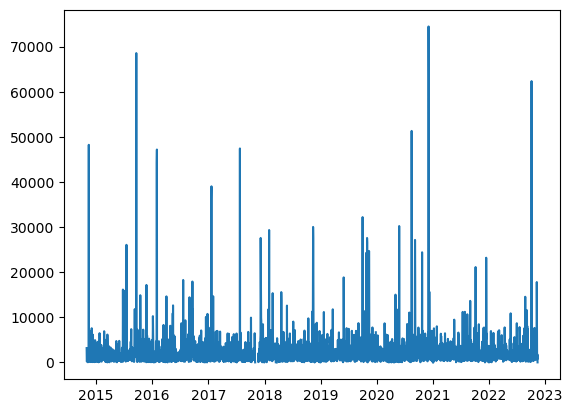

In [125]:
df1['Date'] = pd.to_datetime(df1['Date'])
plt.plot(df1['Date'], df1['Highest_Outage'])

In [188]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)
    
    df.set_index('Date', inplace=True)
    
    for i in range(1, n_steps+1):
        df[f'Highest_Outage(t-{i})'] = df['Highest_Outage'].shift(i)
        
    df.dropna(inplace=True)
    
    return df

lookback = 7
shifted_df = prepare_dataframe_for_lstm(df1, lookback)
shifted_df

,index,Highest_Outage,Highest_Outage(t-1),Highest_Outage(t-2),Highest_Outage(t-3),Highest_Outage(t-4),Highest_Outage(t-5),Highest_Outage(t-6),Highest_Outage(t-7)
Date,,,,,,,,,
2014-11-08,7,1067.0,388.0,1461.0,1769.0,659.0,205.0,251.0,3191.0
2014-11-09,8,50.0,1067.0,388.0,1461.0,1769.0,659.0,205.0,251.0
2014-11-10,9,2202.0,50.0,1067.0,388.0,1461.0,1769.0,659.0,205.0
2014-11-11,10,101.0,2202.0,50.0,1067.0,388.0,1461.0,1769.0,659.0
2014-11-12,11,501.0,101.0,2202.0,50.0,1067.0,388.0,1461.0,1769.0
...,...,...,...,...,...,...,...,...,...
2022-11-08,311,4974.0,17818.0,1515.0,1437.0,3018.0,1544.0,3483.0,3038.0
2022-11-09,312,1038.0,4974.0,17818.0,1515.0,1437.0,3018.0,1544.0,3483.0
2022-11-10,313,682.0,1038.0,4974.0,17818.0,1515.0,1437.0,3018.0,1544.0


In [155]:
df1

,index,Date,Highest_Outage
0,0,2014-11-01,3191.0
1,1,2014-11-02,251.0
2,2,2014-11-03,205.0
3,3,2014-11-04,659.0
4,4,2014-11-05,1769.0
...,...,...,...
2927,311,2022-11-08,4974.0
2928,312,2022-11-09,1038.0
2929,313,2022-11-10,682.0
2930,314,2022-11-11,1778.0


In [186]:
df1.drop(['index'], axis=1)

,Date,Highest_Outage
0,2014-11-01,3191.0
1,2014-11-02,251.0
2,2014-11-03,205.0
3,2014-11-04,659.0
4,2014-11-05,1769.0
...,...,...
2927,2022-11-08,4974.0
2928,2022-11-09,1038.0
2929,2022-11-10,682.0
2930,2022-11-11,1778.0


In [189]:
shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np

array([[7.0000e+00, 1.0670e+03, 3.8800e+02, ..., 2.0500e+02, 2.5100e+02,
        3.1910e+03],
       [8.0000e+00, 5.0000e+01, 1.0670e+03, ..., 6.5900e+02, 2.0500e+02,
        2.5100e+02],
       [9.0000e+00, 2.2020e+03, 5.0000e+01, ..., 1.7690e+03, 6.5900e+02,
        2.0500e+02],
       ...,
       [3.1300e+02, 6.8200e+02, 1.0380e+03, ..., 1.4370e+03, 3.0180e+03,
        1.5440e+03],
       [3.1400e+02, 1.7780e+03, 6.8200e+02, ..., 1.5150e+03, 1.4370e+03,
        3.0180e+03],
       [3.1500e+02, 2.5000e+01, 1.7780e+03, ..., 1.7818e+04, 1.5150e+03,
        1.4370e+03]])

In [190]:
shifted_df_as_np.shape

(2851, 9)

In [191]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[-0.96164384, -0.97136333, -0.98960376, ..., -0.99451981,
        -0.99328408, -0.9143049 ],
       [-0.95616438, -0.99868368, -0.97136333, ..., -0.98232371,
        -0.99451981, -0.99328408],
       [-0.95068493, -0.94087307, -0.99868368, ..., -0.95250504,
        -0.98232371, -0.99451981],
       ...,
       [ 0.71506849, -0.98170584, -0.97214238, ..., -0.96142377,
        -0.91895232, -0.95854936],
       [ 0.72054795, -0.95226326, -0.98170584, ..., -0.95932841,
        -0.96142377, -0.91895232],
       [ 0.7260274 , -0.99935527, -0.95226326, ..., -0.52137005,
        -0.95932841, -0.96142377]])

In [192]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((2851, 8), (2851,))

In [193]:
X = dc(np.flip(X, axis=1))
X

array([[-0.9143049 , -0.99328408, -0.99451981, ..., -0.96077905,
        -0.98960376, -0.97136333],
       [-0.99328408, -0.99451981, -0.98232371, ..., -0.98960376,
        -0.97136333, -0.99868368],
       [-0.99451981, -0.98232371, -0.95250504, ..., -0.97136333,
        -0.99868368, -0.94087307],
       ...,
       [-0.95854936, -0.91895232, -0.96142377, ..., -0.86640698,
        -0.97214238, -0.98170584],
       [-0.91895232, -0.96142377, -0.95932841, ..., -0.97214238,
        -0.98170584, -0.95226326],
       [-0.96142377, -0.95932841, -0.52137005, ..., -0.98170584,
        -0.95226326, -0.99935527]])

In [194]:
split_index = int(len(X) * 0.95)

split_index

2708

In [195]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2708, 8), (143, 8), (2708,), (143,))

In [196]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

ValueError: cannot reshape array of size 21664 into shape (7,1)

In [197]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))


ValueError: cannot reshape array of size 21664 into shape (7,1)

In [198]:
y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))


In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [200]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(2708, 8) (143, 8) (2708, 1) (143, 1)


In [201]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([2708, 8]),
 torch.Size([143, 8]),
 torch.Size([2708, 1]),
 torch.Size([143, 1]))

In [202]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [203]:
train_dataset

In [204]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [205]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 8]) torch.Size([16, 1])


In [206]:
import torch

# Check if a GPU is available, and if so, use it; otherwise, use the CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Assuming your train_loader is already defined, you can now use the device as follows:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 8]) torch.Size([16, 1])


In [207]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [208]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [209]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [210]:
h0 = torch.zeros(1, batch_size, hidden_size).to(device)
c0 = torch.zeros(1, batch_size, hidden_size).to(device)



NameError: name 'hidden_size' is not defined

In [211]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1


RuntimeError: For unbatched 2-D input, hx and cx should also be 2-D but got (3-D, 3-D) tensors

In [212]:
def train_one_epoch():
    model.train()  # Set the model to training mode
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        optimizer.zero_grad()  # Zero the gradients
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)  # Forward pass
        loss = loss_function(output, y_batch)  # Compute the loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update the weights
        
        running_loss += loss.item()
    
    average_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {average_loss:.4f}")

def validate_one_epoch():
    model.eval()  # Set the model to evaluation mode
    running_loss = 0.0
    
    with torch.no_grad():
        for batch_index, batch in enumerate(val_loader):
            x_batch, y_batch = batch[0].to(device), batch[1].to(device)
            
            output = model(x_batch)  # Forward pass
            loss = loss_function(output, y_batch)  # Compute the loss
            
            running_loss += loss.item()
    
    average_loss = running_loss / len(val_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}] - Validation Loss: {average_loss:.4f}")

# Now run the training loop
for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()


RuntimeError: For unbatched 2-D input, hx and cx should also be 2-D but got (3-D, 3-D) tensors

In [213]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Outage')
plt.plot(predicted, label='Predicted Outage')
plt.xlabel('Day')
plt.ylabel('Outage')
plt.legend()
plt.show()

RuntimeError: For unbatched 2-D input, hx and cx should also be 2-D but got (3-D, 3-D) tensors

In [214]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

NameError: name 'predicted' is not defined

In [215]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

ValueError: operands could not be broadcast together with shapes (2708,8) (9,) (2708,8) 

In [216]:
plt.plot(new_y_train, label='Actual Outage')
plt.plot(train_predictions, label='Predicted Outage')
plt.xlabel('Day')
plt.ylabel('Outage')
plt.legend()
plt.show()

NameError: name 'new_y_train' is not defined

In [217]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

RuntimeError: For unbatched 2-D input, hx and cx should also be 2-D but got (3-D, 3-D) tensors

In [218]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

ValueError: operands could not be broadcast together with shapes (143,8) (9,) (143,8) 

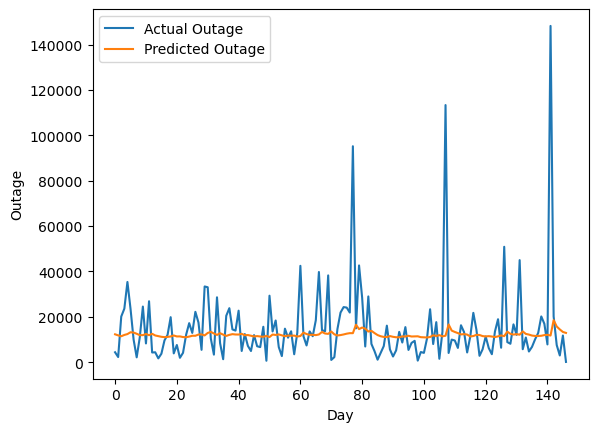

In [177]:
plt.plot(new_y_test, label='Actual Outage')
plt.plot(test_predictions, label='Predicted Outage')
plt.xlabel('Day')
plt.ylabel('Outage')
plt.legend()
plt.show()

In [178]:
df1

,date,Highest_Outage
0,2014-11-01,20381.0
1,2014-11-02,1958.0
2,2014-11-03,1577.0
3,2014-11-04,2641.0
4,2014-11-05,2824.0
...,...,...
2927,2022-11-08,20202.0
2928,2022-11-09,7563.0
2929,2022-11-10,2976.0
2930,2022-11-11,11770.0


In [179]:
df

,Date,Highest_Outage,date
0,2014-11-01 06:00:00,377.0,2014-11-01
1,2014-11-01 07:00:00,0.0,2014-11-01
2,2014-11-01 08:00:00,0.0,2014-11-01
3,2014-11-01 09:00:00,0.0,2014-11-01
4,2014-11-01 10:00:00,0.0,2014-11-01
...,...,...,...
7574,2022-11-12 14:00:00,0.0,2022-11-12
7575,2022-11-12 15:00:00,22.0,2022-11-12
7576,2022-11-12 16:00:00,25.0,2022-11-12
7577,2022-11-12 17:00:00,25.0,2022-11-12


In [180]:
# Convert run_start_time to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the run_start_time column as the DataFrame index
df.set_index('Date', inplace=True)

In [181]:
df

,Highest_Outage,date
Date,,
2014-11-01 06:00:00,377.0,2014-11-01
2014-11-01 07:00:00,0.0,2014-11-01
2014-11-01 08:00:00,0.0,2014-11-01
2014-11-01 09:00:00,0.0,2014-11-01
2014-11-01 10:00:00,0.0,2014-11-01
...,...,...
2022-11-12 14:00:00,0.0,2022-11-12
2022-11-12 15:00:00,22.0,2022-11-12
2022-11-12 16:00:00,25.0,2022-11-12


In [182]:
# Group the 'hourly_sum' data by date and sum the values for each date
df_grouped = df.groupby('date').sum()

In [183]:
df1=df_grouped

In [184]:
df1=df1.reset_index()

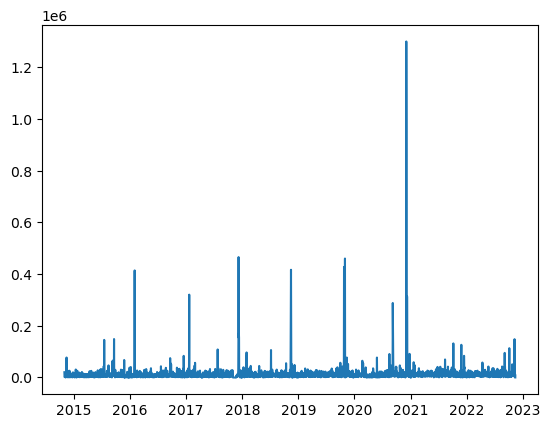

In [186]:
df1['date'] = pd.to_datetime(df1['date'])
plt.plot(df1['date'], df1['Highest_Outage'])

In [187]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)
    
    df.set_index('date', inplace=True)
    
    for i in range(1, n_steps+1):
        df[f'Highest_Outage(t-{i})'] = df['Highest_Outage'].shift(i)
        
    df.dropna(inplace=True)
    
    return df

lookback = 7
shifted_df = prepare_dataframe_for_lstm(df1, lookback)
shifted_df

,Highest_Outage,Highest_Outage(t-1),Highest_Outage(t-2),Highest_Outage(t-3),Highest_Outage(t-4),Highest_Outage(t-5),Highest_Outage(t-6),Highest_Outage(t-7)
date,,,,,,,,
2014-11-08,5537.0,2838.0,4737.0,2824.0,2641.0,1577.0,1958.0,20381.0
2014-11-09,243.0,5537.0,2838.0,4737.0,2824.0,2641.0,1577.0,1958.0
2014-11-10,11421.0,243.0,5537.0,2838.0,4737.0,2824.0,2641.0,1577.0
2014-11-11,1267.0,11421.0,243.0,5537.0,2838.0,4737.0,2824.0,2641.0
2014-11-12,3731.0,1267.0,11421.0,243.0,5537.0,2838.0,4737.0,2824.0
...,...,...,...,...,...,...,...,...
2022-11-08,20202.0,148208.0,7851.0,16932.0,20184.0,12912.0,10118.0,6778.0
2022-11-09,7563.0,20202.0,148208.0,7851.0,16932.0,20184.0,12912.0,10118.0
2022-11-10,2976.0,7563.0,20202.0,148208.0,7851.0,16932.0,20184.0,12912.0


In [188]:
df1

,date,Highest_Outage
0,2014-11-01,20381.0
1,2014-11-02,1958.0
2,2014-11-03,1577.0
3,2014-11-04,2641.0
4,2014-11-05,2824.0
...,...,...
2927,2022-11-08,20202.0
2928,2022-11-09,7563.0
2929,2022-11-10,2976.0
2930,2022-11-11,11770.0


In [189]:
shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np

array([[5.53700e+03, 2.83800e+03, 4.73700e+03, ..., 1.57700e+03,
        1.95800e+03, 2.03810e+04],
       [2.43000e+02, 5.53700e+03, 2.83800e+03, ..., 2.64100e+03,
        1.57700e+03, 1.95800e+03],
       [1.14210e+04, 2.43000e+02, 5.53700e+03, ..., 2.82400e+03,
        2.64100e+03, 1.57700e+03],
       ...,
       [2.97600e+03, 7.56300e+03, 2.02020e+04, ..., 1.69320e+04,
        2.01840e+04, 1.29120e+04],
       [1.17700e+04, 2.97600e+03, 7.56300e+03, ..., 7.85100e+03,
        1.69320e+04, 2.01840e+04],
       [1.39000e+02, 1.17700e+04, 2.97600e+03, ..., 1.48208e+05,
        7.85100e+03, 1.69320e+04]])

In [190]:
shifted_df_as_np.shape

(2925, 8)

In [191]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[-0.99148435, -0.99563529, -0.99271471, ..., -0.99757465,
        -0.99698869, -0.96865496],
       [-0.99962628, -0.99148435, -0.99563529, ..., -0.99593826,
        -0.99757465, -0.99698869],
       [-0.98243503, -0.99962628, -0.99148435, ..., -0.99565682,
        -0.99593826, -0.99757465],
       ...,
       [-0.99542305, -0.98836845, -0.96893025, ..., -0.97395936,
        -0.96895794, -0.98014194],
       [-0.98189828, -0.99542305, -0.98836845, ..., -0.98792552,
        -0.97395936, -0.96895794],
       [-0.99978622, -0.98189828, -0.99542305, ..., -0.77206291,
        -0.98792552, -0.97395936]])

In [192]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((2925, 7), (2925,))

In [193]:
X = dc(np.flip(X, axis=1))
X

array([[-0.96865496, -0.99698869, -0.99757465, ..., -0.99565682,
        -0.99271471, -0.99563529],
       [-0.99698869, -0.99757465, -0.99593826, ..., -0.99271471,
        -0.99563529, -0.99148435],
       [-0.99757465, -0.99593826, -0.99565682, ..., -0.99563529,
        -0.99148435, -0.99962628],
       ...,
       [-0.98014194, -0.96895794, -0.97395936, ..., -0.77206291,
        -0.96893025, -0.98836845],
       [-0.96895794, -0.97395936, -0.98792552, ..., -0.96893025,
        -0.98836845, -0.99542305],
       [-0.97395936, -0.98792552, -0.77206291, ..., -0.98836845,
        -0.99542305, -0.98189828]])

In [194]:
split_index = int(len(X) * 0.95)

split_index

2778

In [195]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2778, 7), (147, 7), (2778,), (147,))

In [196]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2778, 7, 1), (147, 7, 1), (2778, 1), (147, 1))

In [197]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([2778, 7, 1]),
 torch.Size([147, 7, 1]),
 torch.Size([2778, 1]),
 torch.Size([147, 1]))

In [198]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [199]:
train_dataset

In [200]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [201]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1])


In [202]:
import torch

# Check if a GPU is available, and if so, use it; otherwise, use the CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Assuming your train_loader is already defined, you can now use the device as follows:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1])


In [203]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [204]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [205]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [206]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.069

Val Loss: 0.001
***************************************************

Epoch: 2
Batch 100, Loss: 0.004

Val Loss: 0.001
***************************************************

Epoch: 3
Batch 100, Loss: 0.002

Val Loss: 0.001
***************************************************

Epoch: 4
Batch 100, Loss: 0.006

Val Loss: 0.001
***************************************************

Epoch: 5
Batch 100, Loss: 0.005

Val Loss: 0.001
***************************************************

Epoch: 6
Batch 100, Loss: 0.004

Val Loss: 0.001
***************************************************

Epoch: 7
Batch 100, Loss: 0.005

Val Loss: 0.001
***************************************************

Epoch: 8
Batch 100, Loss: 0.004

Val Loss: 0.001
***************************************************

Epoch: 9
Batch 100, Loss: 0.002

Val Loss: 0.001
***************************************************

Epoch: 10
Batch 100, Loss: 0.005

Val Loss: 0.001
********************************

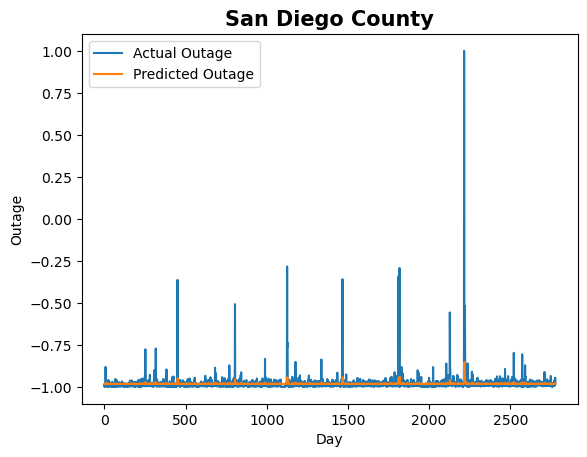

In [207]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Outage')
plt.plot(predicted, label='Predicted Outage')
plt.title('San Diego County', weight='bold', fontsize=15)
plt.xlabel('Day')
plt.ylabel('Outage')
plt.legend()
plt.show()

In [208]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([11588.9156251 , 11708.51603717, 11468.1525389 , ...,
       12080.49424684, 12344.88634378, 13308.35563868])

In [209]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([ 5537.00300458,   242.99889296, 11420.98672506, ...,
       16703.98418826, 35461.98724863, 11764.01434892])

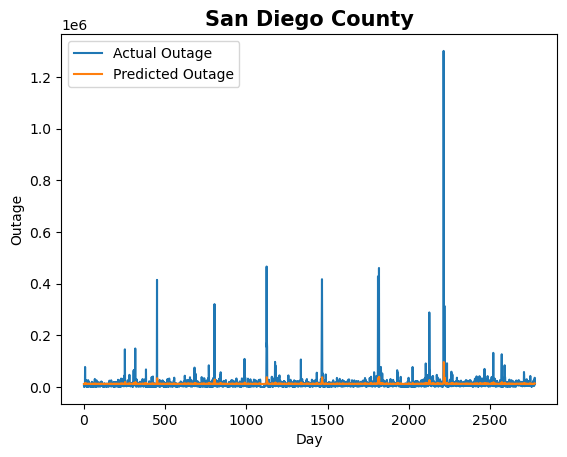

In [210]:
plt.plot(new_y_train, label='Actual Outage')
plt.plot(train_predictions, label='Predicted Outage')
plt.title('San Diego County', weight='bold', fontsize=15)
plt.xlabel('Day')
plt.ylabel('Outage')
plt.legend()
plt.show()

In [211]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([12296.67412323, 11850.82735056, 11679.52669555, 12500.29711902,
       12752.98496306, 13379.43378377, 12909.55841243, 12226.75865227,
       11762.73540738, 12099.63961416, 12767.24709904, 12046.62167388,
       12879.05759445, 11879.89420378, 11778.89657778, 11611.97532865,
       11664.72197831, 11934.92744589, 12082.23825803, 12488.20530808,
       11780.44680995, 11891.13338703, 11619.30017567, 11681.54199737,
       12059.21731028, 12352.83128366, 12194.04875344, 12651.83231384,
       12492.9335162 , 11906.36441812, 13201.46713042, 13339.05023569,
       12288.10909048, 11827.03128672, 12975.71457037, 12107.08072859,
       11663.48179257, 12513.08653444, 12764.80548337, 12361.93889767,
       12302.95256352, 12723.18174955, 11911.82898653, 12178.08136207,
       11930.54804   , 11779.36164743, 12088.82674477, 11876.4061814 ,
       11833.42599443, 12263.88671279, 11588.37304384, 12915.06173664,
       12306.40183011, 12502.50619987, 11961.43641603, 11701.22994596,
      

In [212]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([4.39599337e+03, 2.29399481e+03, 2.01410039e+04, 2.36079819e+04,
       3.53709886e+04, 2.35970140e+04, 9.98198371e+03, 2.16300019e+03,
       1.09459956e+04, 2.45349820e+04, 8.28199911e+03, 2.68750187e+04,
       4.29600340e+03, 4.38901733e+03, 1.70498410e+03, 3.75698767e+03,
       9.62101215e+03, 1.20980119e+04, 1.98540172e+04, 3.89798128e+03,
       7.59400607e+03, 1.95701309e+03, 4.14501078e+03, 1.20799904e+04,
       1.72259861e+04, 1.29169995e+04, 2.22180050e+04, 1.75089810e+04,
       5.46600237e+03, 3.33980081e+04, 3.30369978e+04, 1.04799958e+04,
       3.35598136e+03, 2.86149993e+04, 8.40400238e+03, 1.33401354e+03,
       2.04779857e+04, 2.38219915e+04, 1.44719987e+04, 1.39339906e+04,
       2.27229931e+04, 4.96601374e+03, 1.24310017e+04, 7.20598296e+03,
       4.94500809e+03, 1.19629866e+04, 7.04700665e+03, 6.65801464e+03,
       1.56299833e+04, 6.59003696e+02, 2.93239980e+04, 1.35570129e+04,
       1.84029999e+04, 6.69700298e+03, 2.70899196e+03, 1.47949895e+04,
      

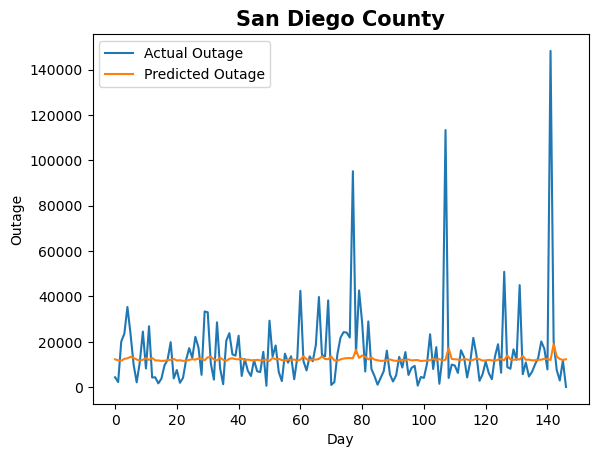

In [213]:
plt.plot(new_y_test, label='Actual Outage')
plt.plot(test_predictions, label='Predicted Outage')
plt.title('San Diego County', weight='bold', fontsize=15)
plt.xlabel('Day')
plt.ylabel('Outage')
plt.legend()
plt.show()

In [216]:
trainScore = np.sqrt(mean_squared_error(y_train, train_predictions))
print('Train Score: %.2f RMSE' % (trainScore))

NameError: name 'mean_squared_error' is not defined

In [225]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

from prophet import Prophet
from xgboost import XGBRegressor

In [226]:
testScore = np.sqrt(mean_squared_error(y_test, test_predictions))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 12398.51 RMSE


In [233]:
trainScore = np.sqrt(mean_squared_error(y_train, train_predictions))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 12596.13 RMSE


In [227]:
# Calculate the Mean Absolute Error (MAE)
mae = np.mean(np.abs(train_predictions - test_predictions))
print("Mean Absolute Error (MAE):", mae)

ValueError: operands could not be broadcast together with shapes (2778,) (147,) 

In [232]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(new_y_test, test_predictions)
# Calculate the Root Mean Squared Error (RMSE) for the test set
rmse = np.sqrt(mse)

print('Test RMSE: %.2f' % rmse)

Test RMSE: 18434.31


In [220]:
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset
from darts.dataprocessing.transformers import Scaler
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape

# darts

In [234]:
df1

,date,Highest_Outage
0,2014-11-01,20381.0
1,2014-11-02,1958.0
2,2014-11-03,1577.0
3,2014-11-04,2641.0
4,2014-11-05,2824.0
...,...,...
2927,2022-11-08,20202.0
2928,2022-11-09,7563.0
2929,2022-11-10,2976.0
2930,2022-11-11,11770.0


In [235]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (20,15)

C:\Users\halee\AppData\Local\Temp\ipykernel_2888\4173309574.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [236]:
# Convert the "run_start_time" column to a datetime type
df1['date'] = pd.to_datetime(df1['date'])
                             # Set the run_start_time column as the DataFrame index
df1.set_index('date', inplace=True)

In [237]:
df1

,Highest_Outage
date,
2014-11-01,20381.0
2014-11-02,1958.0
2014-11-03,1577.0
2014-11-04,2641.0
2014-11-05,2824.0
...,...
2022-11-08,20202.0
2022-11-09,7563.0
2022-11-10,2976.0


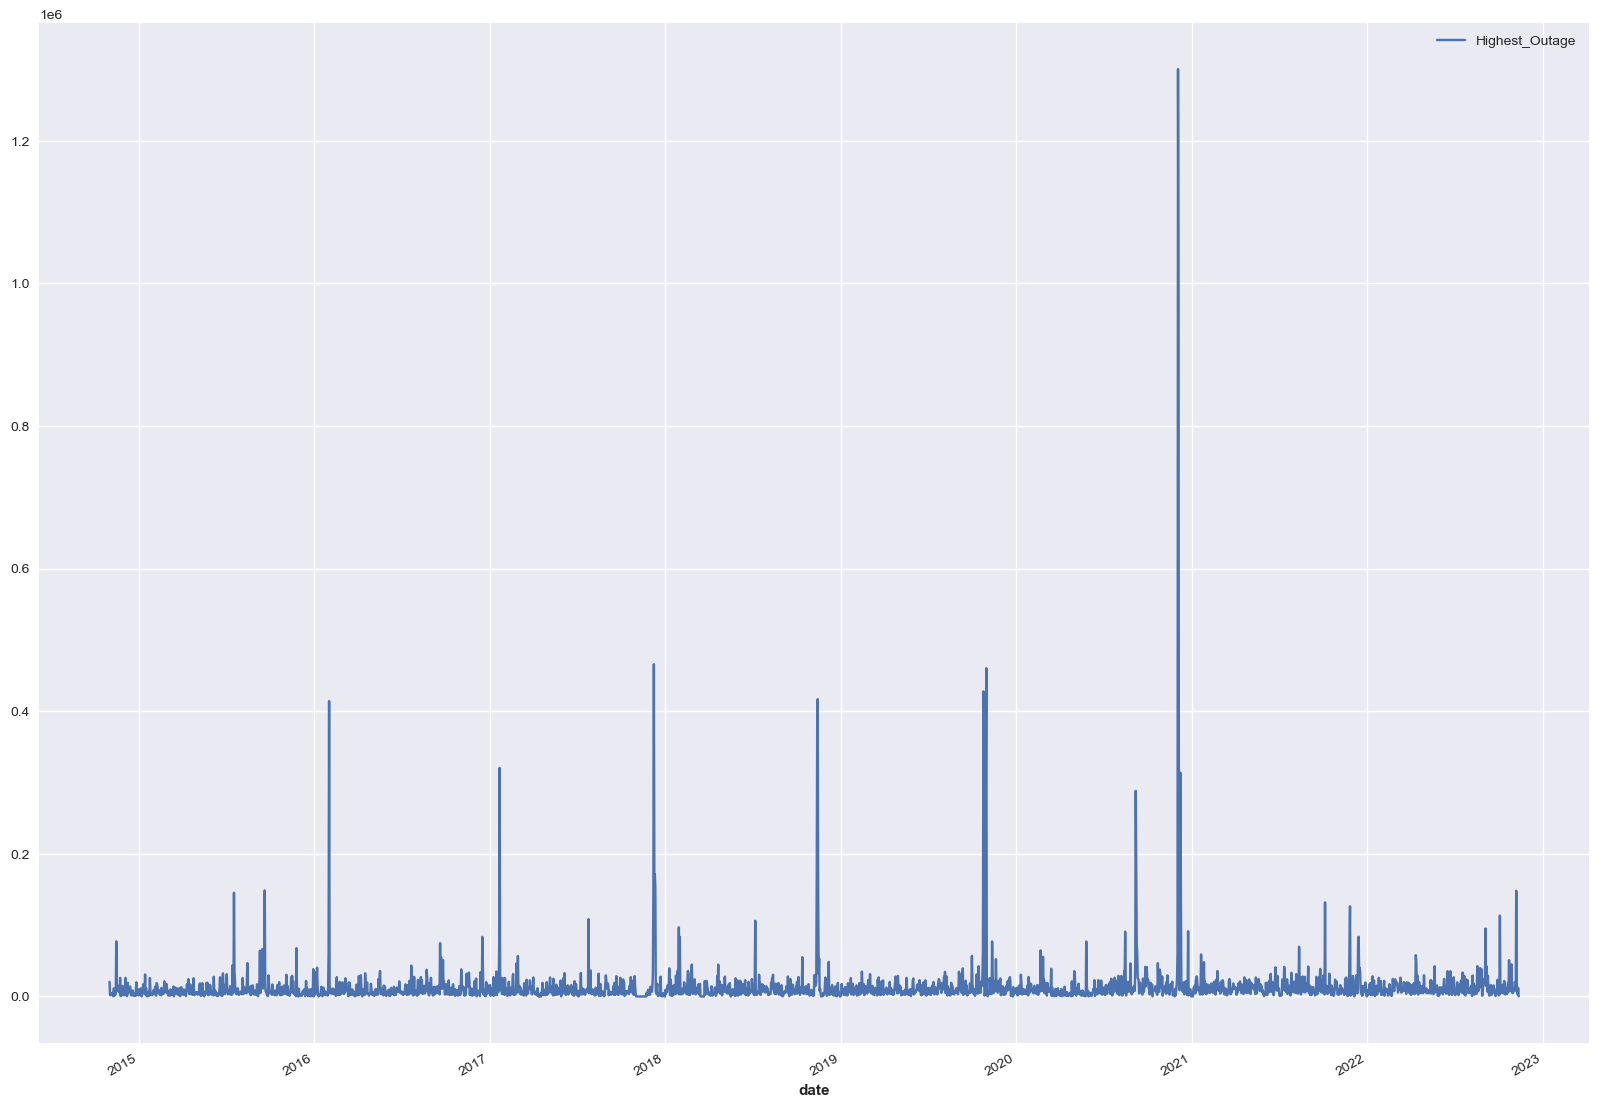

In [238]:
series_power = df1

series_power.plot(label='Number of outages')

plt.legend()

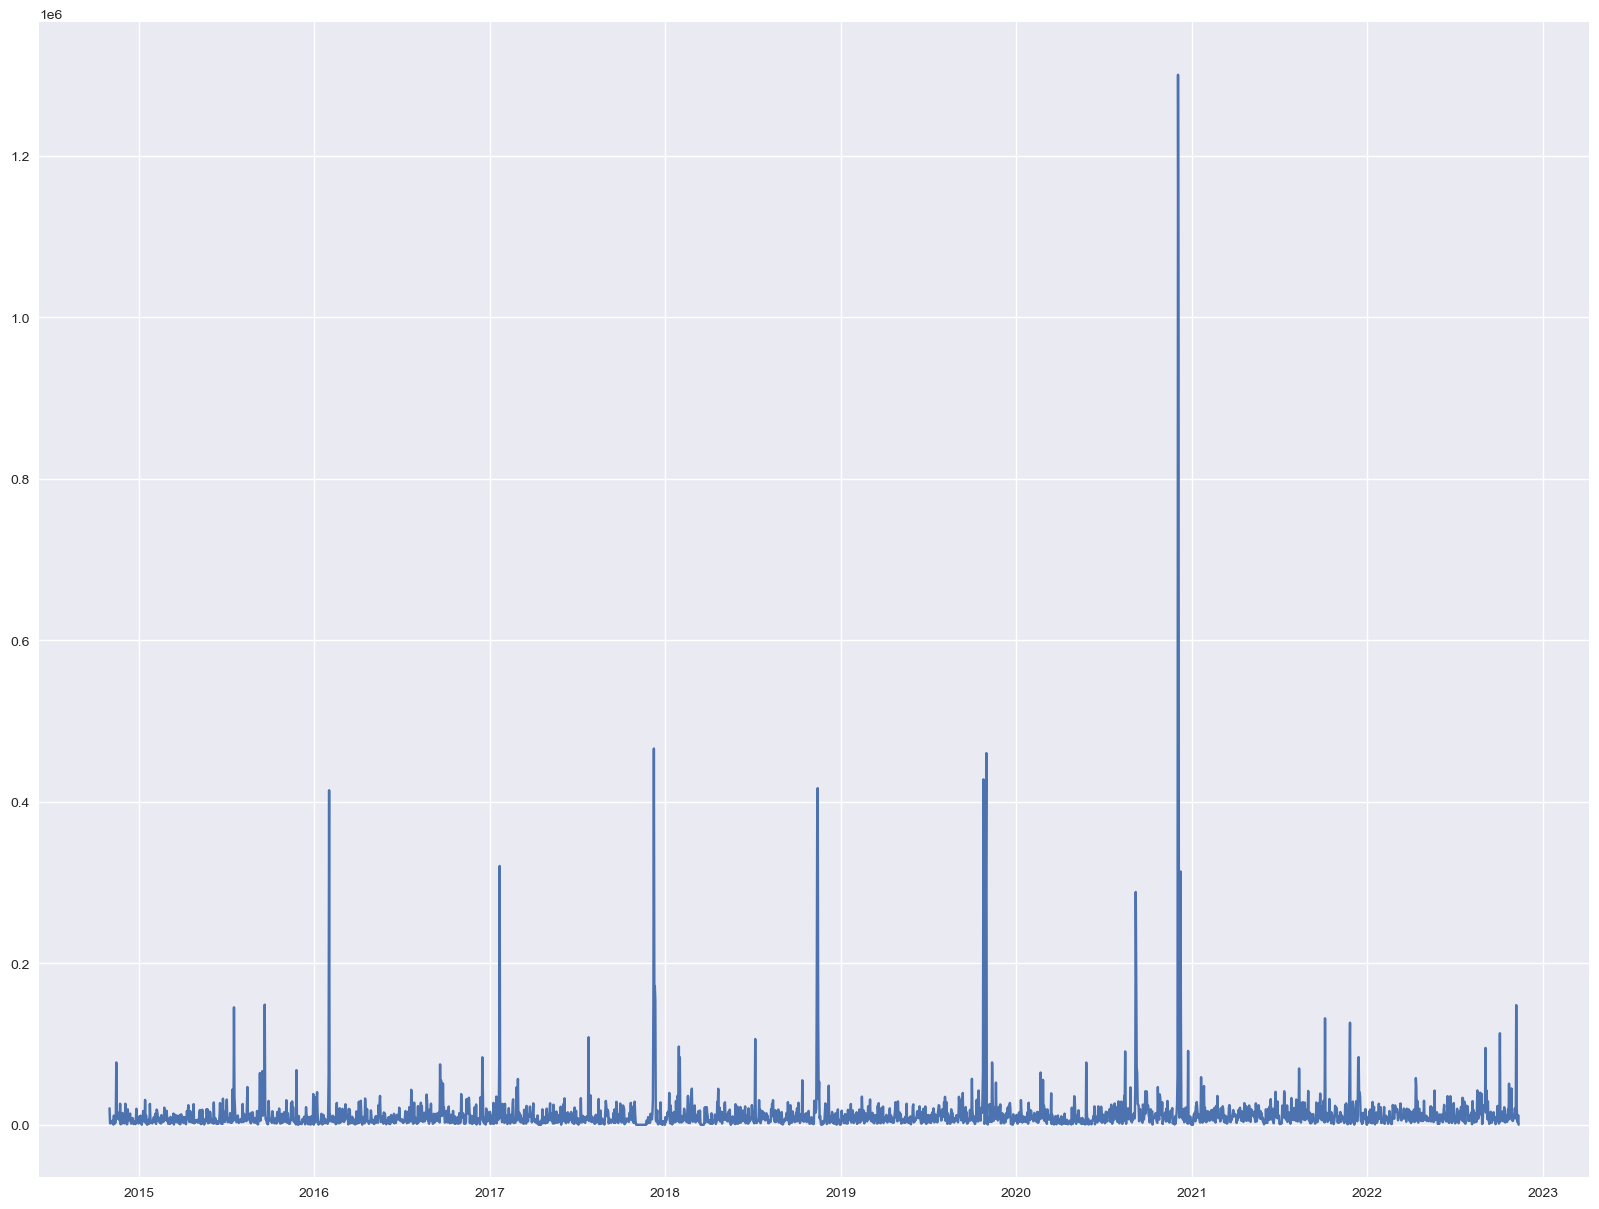

In [239]:
import matplotlib.pyplot as plt

plt.plot(df1.index, df1['Highest_Outage'])

In [240]:
import numpy as np
import datetime
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)
datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [241]:
import numpy as np

def df1_to_windowed_df1(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df1_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df1_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df1_subset['Highest_Outage'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df1 = pd.DataFrame({})
  ret_df1['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df1[f'Target-{n-i}'] = X[:, i]
  
  ret_df1['Target'] = Y

  return ret_df1

# Start day second time around: '2021-03-25'
windowed_df1 = df1_to_windowed_df1(df1, 
                                '2021-11-25', 
                                '2022-12-23', 
                                n=3)
windowed_df1

KeyboardInterrupt: 

In [242]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import tensorflow as tf
import xgboost as xgb
import os
import warnings
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, TimeDistributed, Flatten, Dropout, RepeatVector
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss, ccf
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from math import sqrt

In [244]:
res = sm.tsa.seasonal_decompose(df1['Highest_Outage'], model='additive')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 12))
res.observed.plot(ax=ax1, title='Observed')
res.trend.plot(ax=ax2, title='Trend')
res.resid.plot(ax=ax3, title='Residual')
res.seasonal.plot(ax=ax4, title='Seasonal')
plt.tight_layout()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

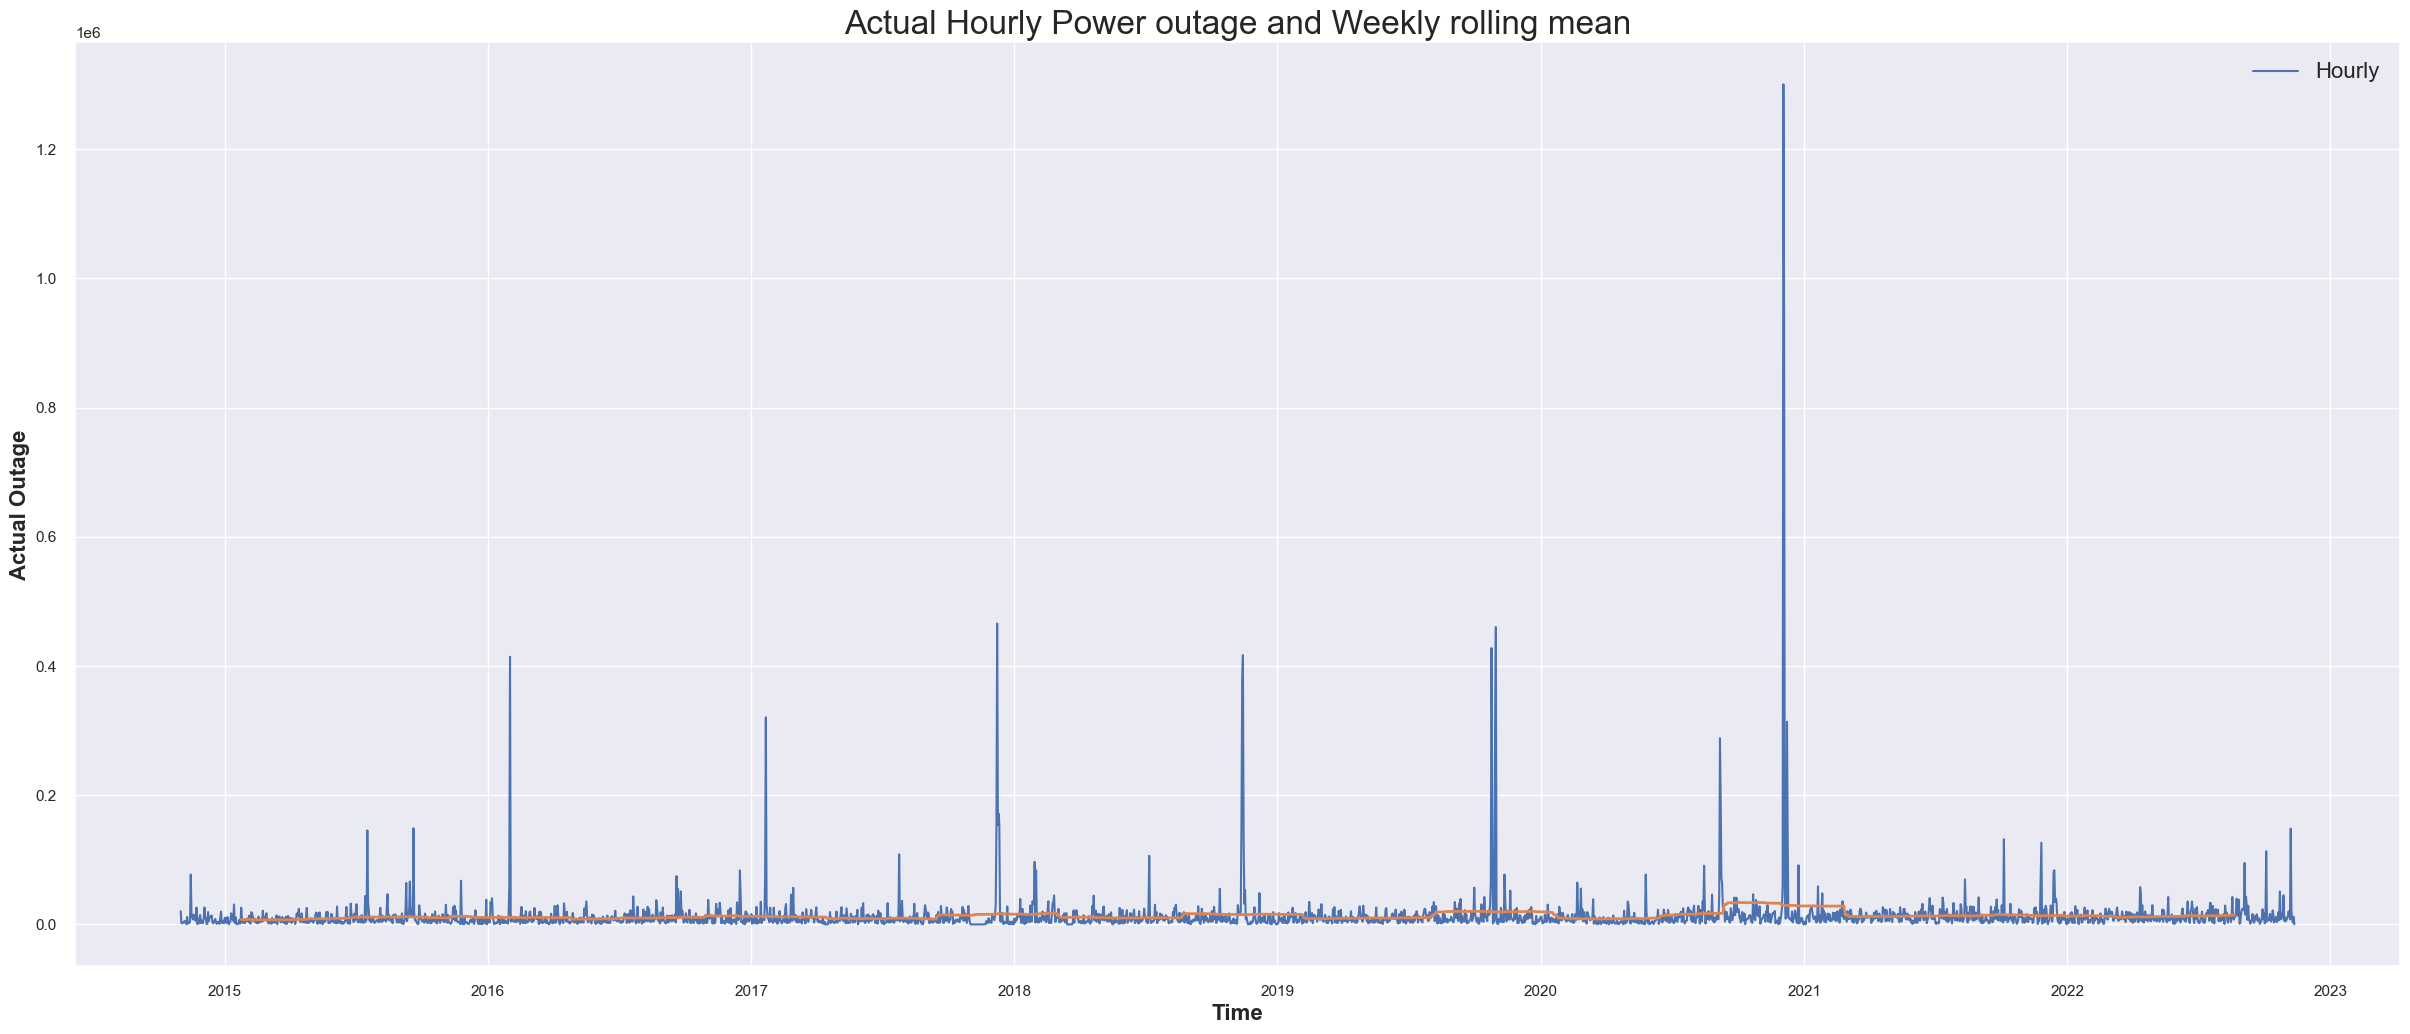

In [247]:
%matplotlib inline
rolling = df1['Highest_Outage'].rolling(24*7, center=True).mean()
ax = plot_series(df1, 'Highest_Outage', label='Hourly', ylabel='Actual Outage',
                 title='Actual Hourly Power outage and Weekly rolling mean')
ax.plot(rolling, linestyle='-', linewidth=2, label='Weekly rolling mean')
plt.show()

In [246]:

def plot_series(df=None, column=None, series=pd.Series([]), 
                label=None, ylabel=None, title=None, start=0, end=None):
    """
    Plots a certain time-series which has either been loaded in a dataframe
    and which constitutes one of its columns or it a custom pandas series 
    created by the user. The user can define either the 'df' and the 'column' 
    or the 'series' and additionally, can also define the 'label', the 
    'ylabel', the 'title', the 'start' and the 'end' of the plot.
    """
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Time', fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

C:\Users\halee\AppData\Local\Temp\ipykernel_2888\2547083941.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def plot_series(df=None, column=None, series=pd.Series([]),


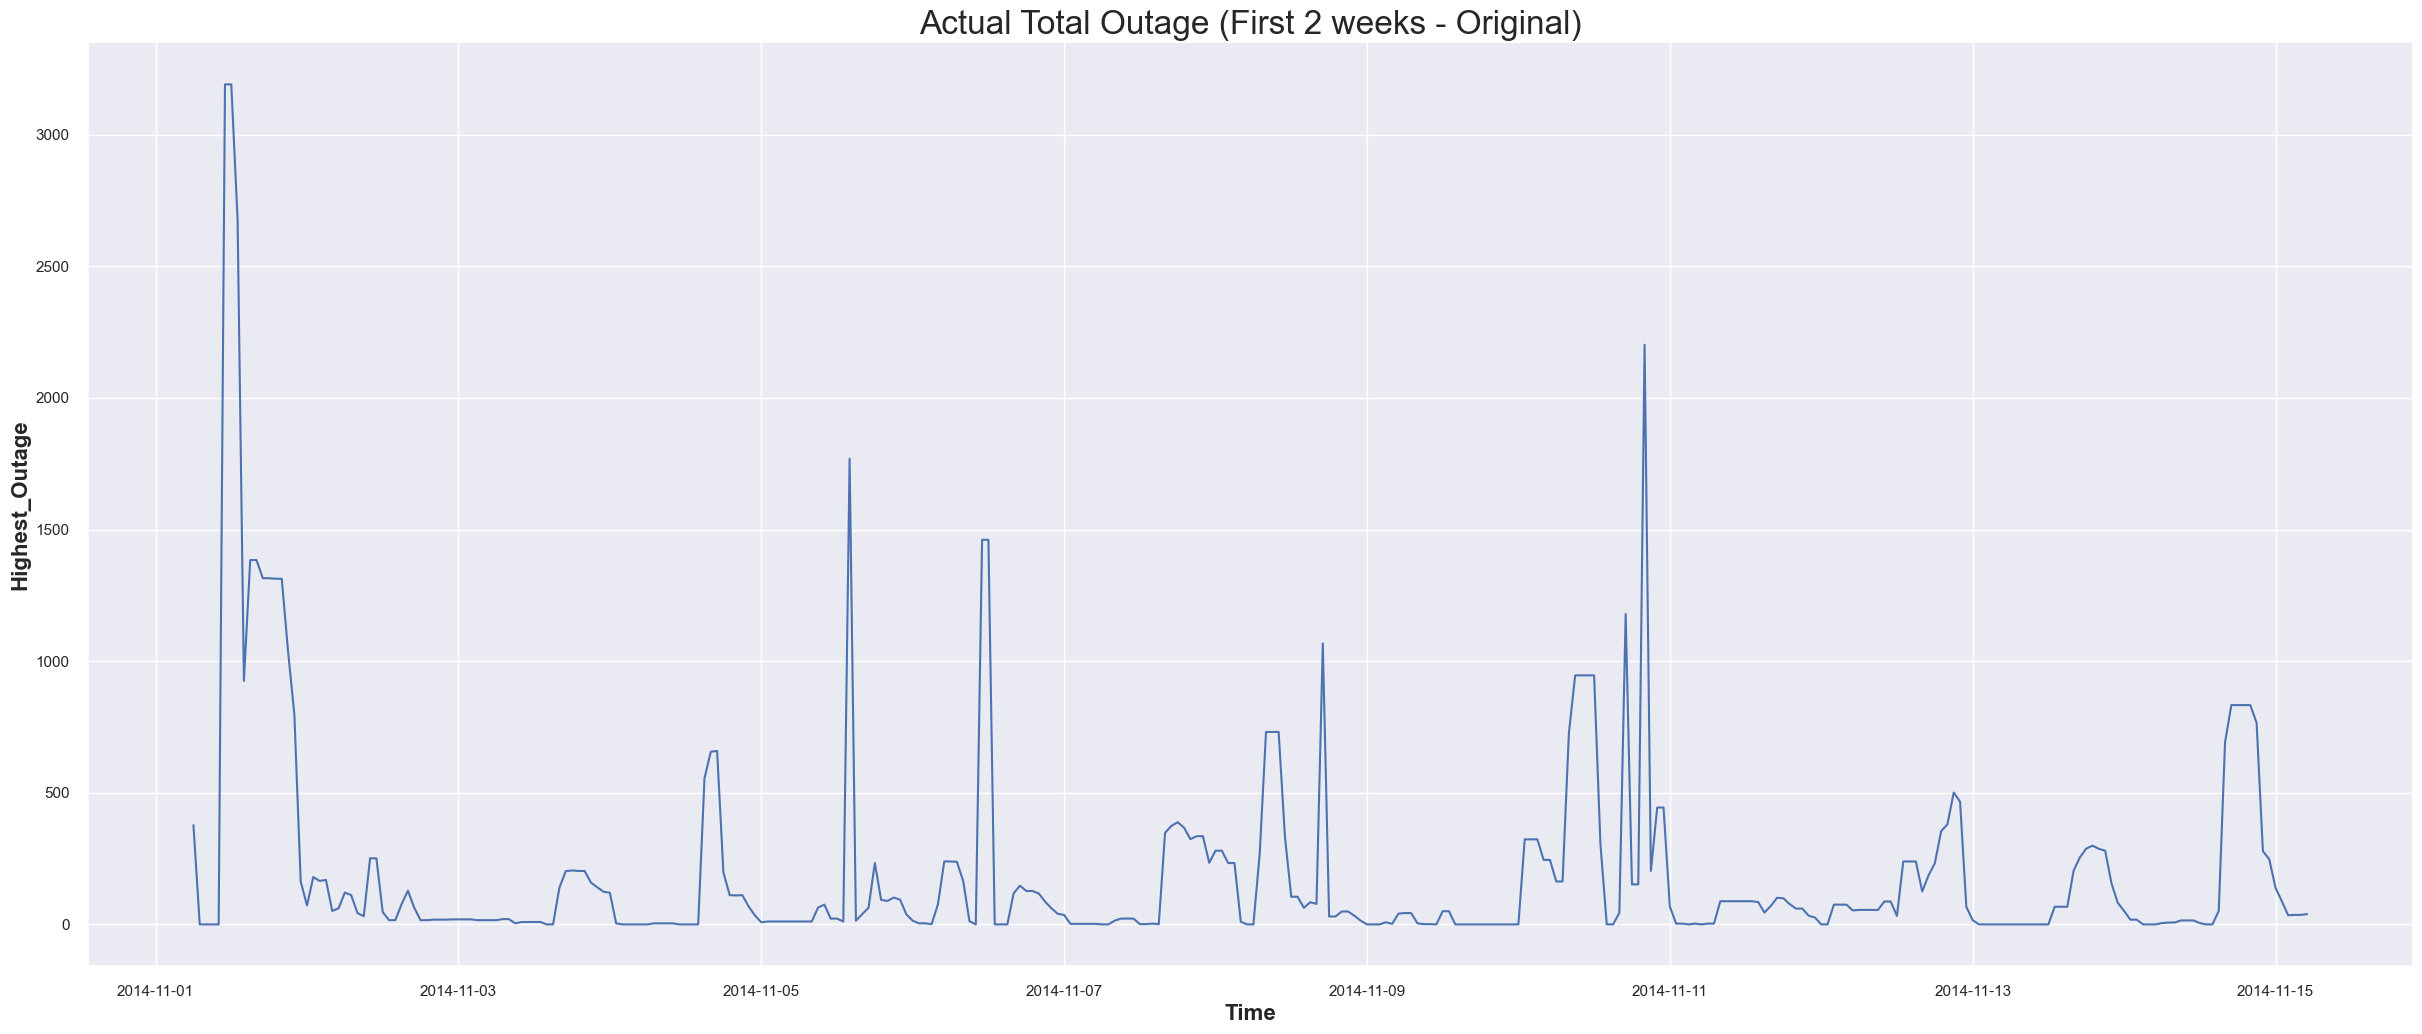

In [252]:
# Zoom into the plot of the hourly (actual) total load

ax = plot_series(df=df3, column='Highest_Outage',ylabel='Highest_Outage',
                 title='Actual Total Outage (First 2 weeks - Original)', end=24*7*2)
plt.show()

In [250]:
df3=df_final

In [253]:
df3

,Highest_Outage,date
Date,,
2014-11-01 06:00:00,377.0,2014-11-01
2014-11-01 07:00:00,0.0,2014-11-01
2014-11-01 08:00:00,0.0,2014-11-01
2014-11-01 09:00:00,0.0,2014-11-01
2014-11-01 10:00:00,0.0,2014-11-01
...,...,...
2022-11-12 14:00:00,0.0,2022-11-12
2022-11-12 15:00:00,22.0,2022-11-12
2022-11-12 16:00:00,25.0,2022-11-12


In [254]:
df3=df3.drop('date')

KeyError: "['date'] not found in axis"

In [255]:
# Display the rows with null values

df3[df3.isnull().any(axis=1)].tail()

,Highest_Outage,date
Date,,


In [256]:
print('Non-zero values in each column:\n', df3.astype(bool).sum(axis=0), sep='\n')

Non-zero values in each column:

Highest_Outage    63511
date              70181
dtype: int64


In [257]:
X = df3[df3.columns.drop('Highest_Outage')].values
y = df3['Highest_Outage'].values

y = y.reshape(-1, 1)

In [258]:
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

In [259]:
scaler_X.fit(X[:train_end_idx])
scaler_y.fit(y[:train_end_idx])

NameError: name 'train_end_idx' is not defined

In [260]:
df

,Highest_Outage,date
Date,,
2014-11-01 06:00:00,377.0,2014-11-01
2014-11-01 07:00:00,0.0,2014-11-01
2014-11-01 08:00:00,0.0,2014-11-01
2014-11-01 09:00:00,0.0,2014-11-01
2014-11-01 10:00:00,0.0,2014-11-01
...,...,...
2022-11-12 14:00:00,0.0,2022-11-12
2022-11-12 15:00:00,22.0,2022-11-12
2022-11-12 16:00:00,25.0,2022-11-12


In [261]:
df_final

,Highest_Outage,date
Date,,
2014-11-01 06:00:00,377.0,2014-11-01
2014-11-01 07:00:00,0.0,2014-11-01
2014-11-01 08:00:00,0.0,2014-11-01
2014-11-01 09:00:00,0.0,2014-11-01
2014-11-01 10:00:00,0.0,2014-11-01
...,...,...
2022-11-12 14:00:00,0.0,2022-11-12
2022-11-12 15:00:00,22.0,2022-11-12
2022-11-12 16:00:00,25.0,2022-11-12


In [262]:
dfn=d_final

In [263]:
dfn


,Date,Highest_Outage
0,2014-11-01,3191.0
1,2014-11-02,251.0
2,2014-11-03,205.0
3,2014-11-04,659.0
4,2014-11-05,1769.0
...,...,...
311,2022-11-08,4974.0
312,2022-11-09,1038.0
313,2022-11-10,682.0
314,2022-11-11,1778.0


In [267]:

# Set the run_start_time column as the DataFrame index
dfn.set_index('Date', inplace=True)

In [268]:
dfn

,Highest_Outage
Date,
2014-11-01,3191.0
2014-11-02,251.0
2014-11-03,205.0
2014-11-04,659.0
2014-11-05,1769.0
...,...
2022-11-08,4974.0
2022-11-09,1038.0
2022-11-10,682.0
